In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import seaborn
import hdbscan
%matplotlib inline

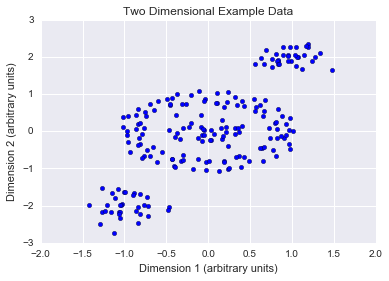

In [11]:
circles, _ = data.make_circles(n_samples=100, noise=0.05)
blobs, _ = data.make_blobs(n_samples=100, centers=[(0,0), (-1, -2), (1,2)], cluster_std=0.25)
test_data = np.vstack([circles, blobs])
plt.scatter(test_data.T[0], test_data.T[1])
plt.title('Two Dimensional Example Data')
plt.xlabel('Dimension 1 (arbitrary units)')
plt.ylabel('Dimension 2 (arbitrary units)')
plt.savefig('scatter.png', dpi=1200)

In [3]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(test_data)


HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=10, min_samples=None, p=None)

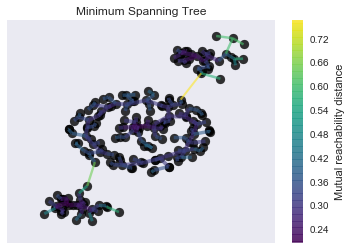

In [16]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)
plt.title('Minimum Spanning Tree')
plt.savefig('min_tree.png', dpi=1200)

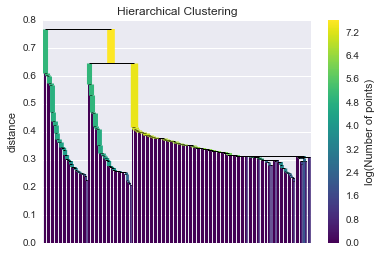

In [13]:
clusterer.single_linkage_tree_.plot(colorbar=True)
plt.title('Hierarchical Clustering')
plt.savefig('dendrogram.png', dpi=1200)

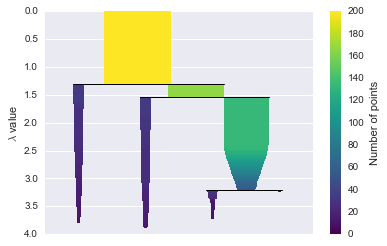

In [6]:
clusterer.condensed_tree_.plot()

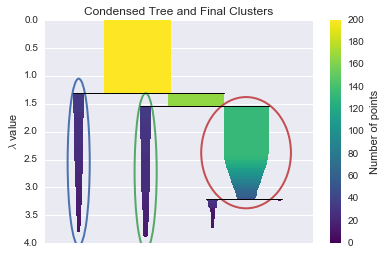

In [17]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.title('Condensed Tree and Final Clusters')
plt.savefig('condensed_and_clusters.png', dpi=1200)